In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import measure

In [3]:
data_path = '../data/'
file_noise = 'gaussian_noise_peppers.png'
file_saltpepper = 'saltandpepper_noise_peppers.png'
file_sharp = 'peppers.png'
file_rice = 'rice.png'

In [4]:
def print_images(list_of_images):
    fig, ax = plt.subplots(1, len(list_of_images), figsize=(20,20))
    for i, (img,name) in enumerate(list_of_images):
        ax[i].set_title(str(name))
        ax[i].imshow(img);

# Q.1 Filtering

## Q.1.1 Denoising

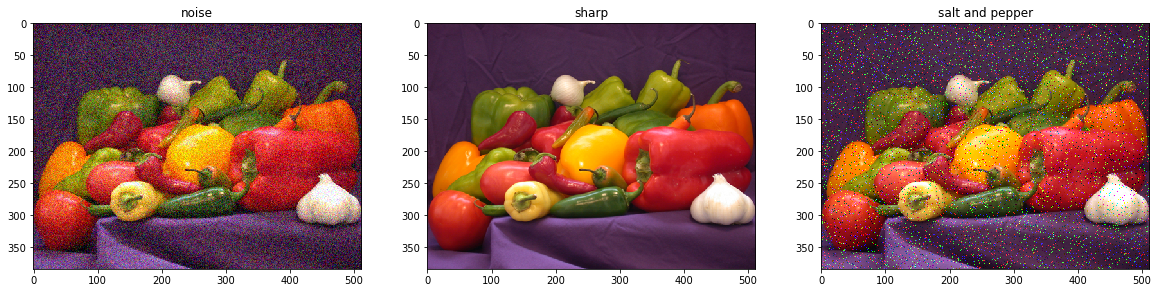

In [5]:
# Getting images and convert to BGR
img_noise = cv2.imread(data_path + file_noise)[:, :, ::-1]
img_sharp = cv2.imread(data_path + file_sharp)[:, :, ::-1]
img_saltpapper = cv2.imread(data_path + file_saltpepper)[:, :, ::-1]
print_images([(img_noise, 'noise'), (img_sharp, 'sharp'), (img_saltpapper, 'salt and pepper')])

### Part 1

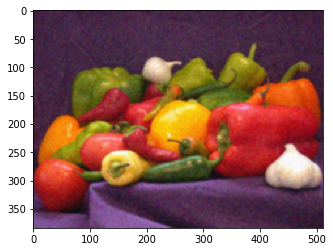

In [6]:
# Gaussian filter
gaussian_filter_img = cv2.GaussianBlur(img_noise, ksize = (7,7), sigmaX = np.sqrt(2))
a = plt.imshow(gaussian_filter_img)

### Part 2

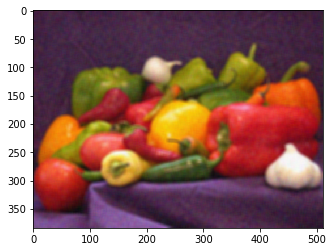

In [7]:
# Box filter
box_filter_img = cv2.blur(img_noise, (7,7))
a = plt.imshow(box_filter_img)

### Part 3

In [8]:
# PSNR
def get_psnr(img_original, img_blur):
    return measure.compare_psnr(img_original, img_blur)

In [9]:
# PSNR for box filter
print("The PSNR for the box filter is equal to %s." % (get_psnr(img_sharp, box_filter_img)))
# PSNR for gaussian filter
print("The PSNR for the gaussian filter is equal to %s." % (get_psnr(img_sharp, gaussian_filter_img)))

The PSNR for the box filter is equal to 28.2783964769.
The PSNR for the gaussian filter is equal to 29.879271671.


The best filter is the __gaussian filter__.

### Part 4

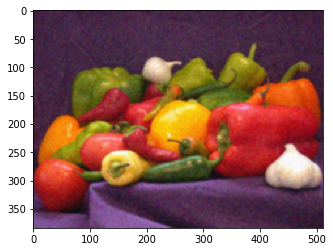

In [10]:
# Gausian filter on salt and papper noise
gaussian_filter_img_saltpepper = cv2.GaussianBlur(img_saltpapper, ksize = (7,7), sigmaX = np.sqrt(2))
a = plt.imshow(gaussian_filter_img)

### Part 5

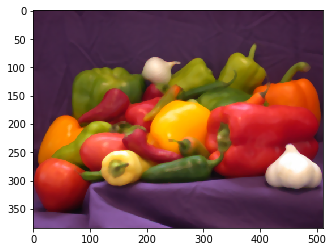

In [11]:
# Median filter on salt and pepper 
median_filter_img_saltpepper = cv2.medianBlur(img_saltpapper, 7)
a = plt.imshow(median_filter_img_saltpepper)

### Part 6

In [12]:
# PSNR for box filter
print("The PSNR for the median filter is equal to %s." % (get_psnr(img_sharp, median_filter_img_saltpepper)))
# PSNR for gaussian filter
print("The PSNR for the gaussian filter is equal to %s." % (get_psnr(img_sharp, gaussian_filter_img_saltpepper)))

The PSNR for the median filter is equal to 31.8710099206.
The PSNR for the gaussian filter is equal to 28.1671611567.


The __median filter__ give better results on the salt and pepper image.

## Q.1.2 Sharpening

In [13]:
img_rice = cv2.imread(data_path + file_rice)

### Part 1

In [14]:
def sharpen_img(image, blur):
    return image + (image - blur)

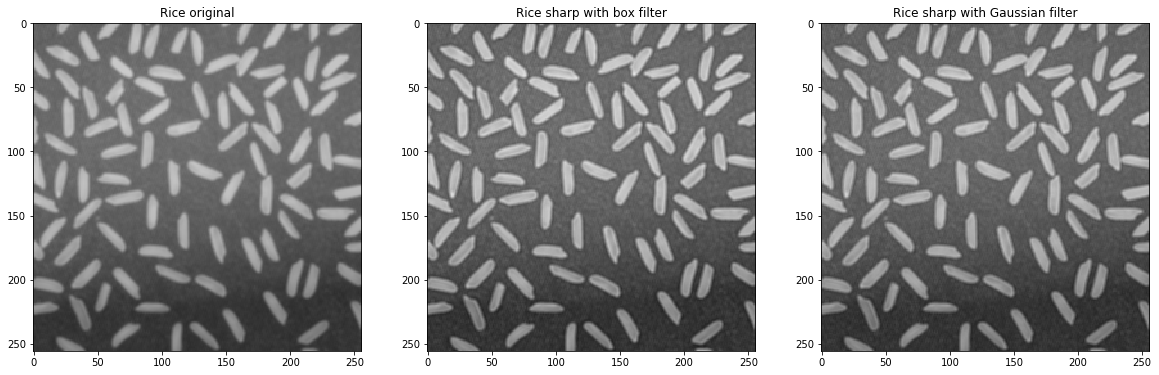

In [16]:
box_filter_img_rice = cv2.blur(img_rice, (5,5))
gaussian_filter_img_rice = cv2.GaussianBlur(img_rice, ksize = (5,5), sigmaX = np.sqrt(2))

sharp_rice_box = sharpen_img(img_rice, box_filter_img_rice)
sharp_rice_gaussian = sharpen_img(img_rice, gaussian_filter_img_rice)  

# Plot results
print_images([(img_rice, 'Rice original'),
              (sharp_rice_box, 'Rice sharp with box filter'),
              (sharp_rice_gaussian, 'Rice sharp with Gaussian filter')])

### Part 2

The Box filter is expected to have a better result. 
    1. The box filter will take an average over the kernel with equal weight for each cells. When substracting the blurred image to the original image, we are given where the "intense changes of colors" are within the image which result in the shapening. 
    2. The Gaussian works the same way but since the cells of the kernel are weighted with a normal distrubution, the "intense changes of colors" are less large, thus creates a less intense sharpening. In other words, the gaussian blur conversess the edges better.